## CCA variants Comparison

In [1]:
from mvlearn.embed import KCCA, DCCA
from mvlearn.datasets import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
## Make Latents
n = 200
mu = [[0,1], [0,-1]]
sigma = 2*np.array([np.eye(2), np.eye(2)])
pi = [0.5,0.5]
GM_train = GaussianMixture(mu,sigma,n,class_probs=pi)

## Test
GM_test = GaussianMixture(mu,sigma,n,class_probs=pi)

In [3]:
## Make 2 views
n_noise = 2
transforms = ['linear', 'poly', 'sin']

Xs_train = []
Xs_test = []
for transform in transforms:
    GM_train.sample_views(transform=transform, n_noise=n_noise)
    GM_test.sample_views(transform=transform, n_noise=n_noise)

    Xs_train.append(GM_train.get_Xy()[0])
    Xs_test.append(GM_test.get_Xy()[0])

In [4]:
## Plotting parameters
labels = GM_test.latent[:,0]
cmap = matplotlib.colors.ListedColormap(sns.diverging_palette(240, 10, n=len(labels), center='light').as_hex())
cmap = 'coolwarm'

In [7]:
method_labels = ['Raw Views', 'Linear KCCA', 'Polynomial KCCA', 'Gaussian KCCA', 'DCCA']
transform_labels = ['Linear Transform', 'Polynomial Transform', 'Sinusoidal Transform']

In [6]:
input_size1, input_size2 = Xs_train[0][0].shape[1], Xs_train[0][1].shape[1]
outdim_size = min(Xs_train[0][0].shape[1], 2)
layer_sizes1 = [256, 256, outdim_size]
layer_sizes2 = [256, 256, outdim_size]
methods = [KCCA(ktype='linear', reg = 0.1, degree=2.0, constant=0.1, n_components = 2),
           KCCA(ktype='poly', reg = 0.1, degree=2.0, constant=0.1, n_components = 2),
           KCCA(ktype='gaussian', reg = 1.0, sigma=2.0, n_components = 2),
           DCCA(input_size1, input_size2, outdim_size, layer_sizes1, layer_sizes2, epoch_num=400)
]

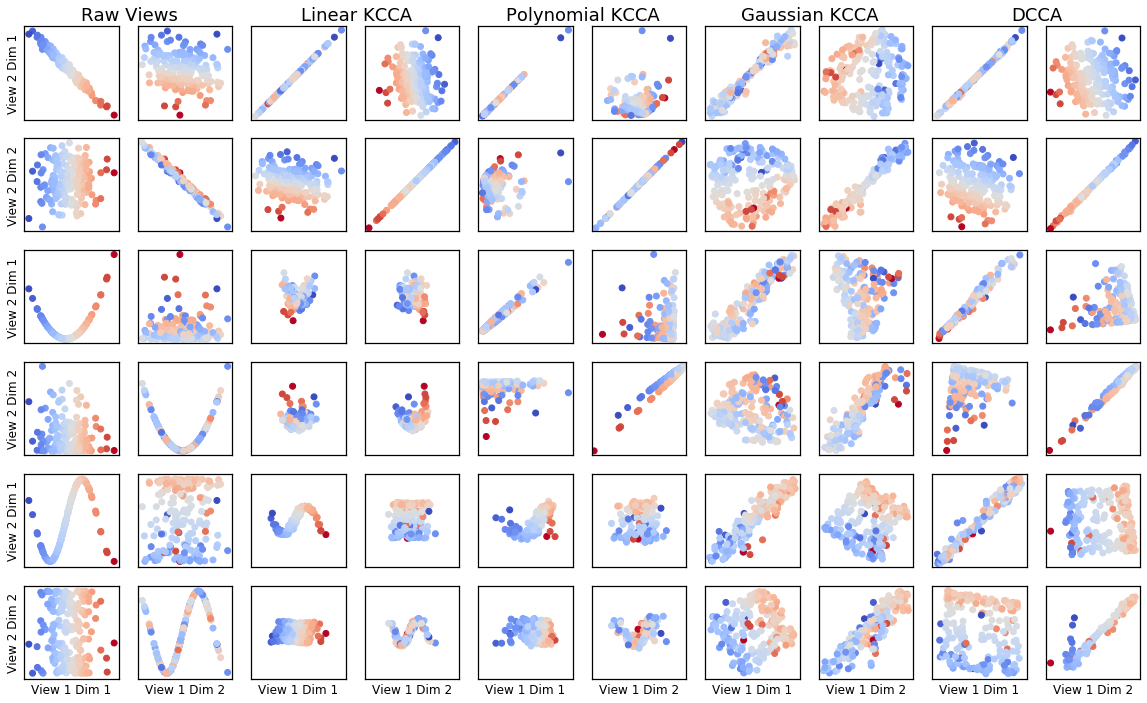

In [53]:
fig, axes = plt.subplots(3*2, 5*2, figsize=(20,12))
sns.set_context('notebook')

for r,transform in enumerate(transforms):
    axs = axes[2*r:2*r+2,:2]
    for i,ax in enumerate(axs.flatten()):
        dim2 = int(i / 2)
        dim1 = i % 2
        ax.scatter(
            Xs_test[r][0][:, dim1],
            Xs_test[r][1][:, dim2],
            cmap=cmap,
            c=labels,
        )
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        if dim1 == 0:
            ax.set_ylabel(f"View 2 Dim {dim2+1}")
        if dim2 == 1 and r == len(transforms)-1:
            ax.set_xlabel(f"View 1 Dim {dim1+1}")
        if i == 0 and r == 0:
            ax.set_title(method_labels[r], {'position':(1.11,1), 'fontsize':18})
    
    for c,method in enumerate(methods):
        axs = axes[2*r:2*r+2,2*c+2:2*c+4]
        Xs = method.fit(Xs_train[r]).transform(Xs_test[r])
        for i,ax in enumerate(axs.flatten()):
            dim2 = int(i / 2)
            dim1 = i % 2
            ax.scatter(
                Xs[0][:, dim1],
                Xs[1][:, dim2],
                cmap=cmap,
                c=labels,
            )
            if dim2 == 1 and r == len(transforms)-1:
                ax.set_xlabel(f"View 1 Dim {dim1+1}")
            if i == 0 and r == 0:
                ax.set_title(method_labels[c+1], {'position':(1.11,1), 'fontsize':18})
            ax.axis("equal")
            ax.set_xticks([], [])
            ax.set_yticks([], [])